# K-Nearest Neighbors

In [18]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('./Occupancy_Estimation.csv')
feature_data = df.drop(columns=["Room_Occupancy_Count", "Date", "Time"])
X_train, X_test, Y_train, Y_test = train_test_split(feature_data, df["Room_Occupancy_Count"], test_size=0.2)

In [3]:
def build_dt(data_X, data_y, max_depth = None, max_leaf_nodes =None):
    '''
    This function does the following:
    1. Builds the decision tree classifier using sklearn 
    2. Fits it to the provided data.
    
    
    Arguments
        data_X - a np.ndarray
        data_y - np.ndarray
        max_depth - None if unrestricted, otherwise an integer for the maximum
                depth the tree can reach.
    
    Returns:
        A trained DecisionTreeClassifier
    '''
    
    # your code here
    
    return DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes).fit(data_X, data_y)

def calculate_precision(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates precision for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    
    # your code here
    
    true_p = (y_true + y_pred) / 2
    true_p = true_p[true_p == 1].sum()
    pred_p = y_pred[y_pred == 1].sum()
    
    return true_p / pred_p

def calculate_recall(y_true, y_pred, pos_label_value=1.0):
    '''
    This function accepts the labels and the predictions, then
    calculates recall for a binary classifier.
    
    Args
        y_true: np.ndarray
        y_pred: np.ndarray
        
        pos_label_value: (float) the number which represents the postiive
        label in the y_true and y_pred arrays. Other numbers will be taken
        to be the non-positive class for the binary classifier.
    
    Returns precision as a floating point number between 0.0 and 1.0
    '''
    
    # your code here
    true_p = (y_true + y_pred) / 2
    true_p = true_p[true_p == 1].sum()
    real_p = y_true[y_true == 1].sum()
    
    return true_p / real_p


In [32]:
model_1 = build_dt(X_train, Y_train, max_depth=4)
predictions = model_1.predict(X_test)

print("Precision: " + str(calculate_precision(Y_test, predictions)))
print("Recall: " + str(calculate_recall(Y_test, predictions)))
print("Tree depth: " + str(model_1.get_depth()))

Precision: 1.0
Recall: 0.9761904761904762
Tree depth: 4


In [64]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html
def get_tree_description(tree, features):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    
    labels = []
    for value in tree.tree_.value:
        labels.append(tree.classes_[np.argmax(value)])

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # If the left and right child of a node is not the same we have a split
        # node
        is_split_node = children_left[node_id] != children_right[node_id]
        # If a split node, append left and right children and depth to `stack`
        # so we can loop through them
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        else:
            is_leaves[node_id] = True

    print(
        "The binary tree structure has {n} nodes and has "
        "the following tree structure:\n".format(n=n_nodes)
    )
    for i in range(n_nodes):
        if is_leaves[i]:
            print(
                "{space}node={node} is a leaf node with label={label}.".format(
                    space=node_depth[i] * "\t", node=i, label=labels[i]
                )
            )
        else:
            print(
                "{space}node={node} is a split node: "
                "go to node {left} if {feature} <= {threshold} "
                "else to node {right}.".format(
                    space=node_depth[i] * "\t",
                    node=i,
                    left=children_left[i],
                    feature=features[feature[i]],
                    threshold=threshold[i],
                    right=children_right[i],
                )
            )
    plot_tree(tree)
    plt.show()

The binary tree structure has 27 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if S1_Light <= 92.0 else to node 14.
	node=1 is a split node: go to node 2 if S5_CO2_Slope <= 0.45576922595500946 else to node 9.
		node=2 is a split node: go to node 3 if S7_PIR <= 0.5 else to node 6.
			node=3 is a split node: go to node 4 if S3_Sound <= 0.6599999964237213 else to node 5.
				node=4 is a leaf node with label=0.
				node=5 is a leaf node with label=3.
			node=6 is a split node: go to node 7 if S4_Temp <= 26.0 else to node 8.
				node=7 is a leaf node with label=3.
				node=8 is a leaf node with label=0.
		node=9 is a split node: go to node 10 if S1_Temp <= 25.90999984741211 else to node 11.
			node=10 is a leaf node with label=3.
			node=11 is a split node: go to node 12 if S2_Temp <= 27.34500026702881 else to node 13.
				node=12 is a leaf node with label=0.
				node=13 is a leaf node with label=3.
	node=14 is a split node: go to node 15 if S3_Light <= 7

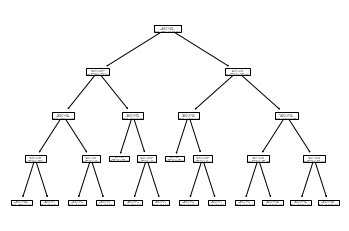

In [65]:
get_tree_description(model_1, feature_data.columns)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.18277055035351406


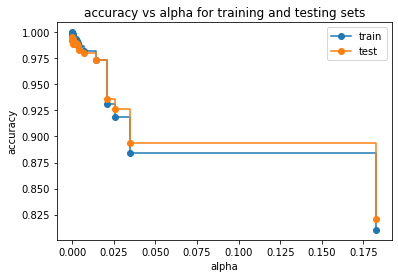

In [66]:
dt = build_dt(X_train, Y_train)

path = dt.cost_complexity_pruning_path(X_train,Y_train) #post pruning
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = [] # VECTOR CONTAINING CLASSIFIERS FOR DIFFERENT ALPHAS
# TODO: iterate over ccp_alpha values 
# your code here
clfs = [DecisionTreeClassifier(ccp_alpha=alpha).fit(X_train, Y_train) for alpha in ccp_alphas]
    
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

train_scores = []
test_scores = []

# your code here
for clf in clfs:
    train_scores.append(clf.score(X_train, Y_train))
    test_scores.append(clf.score(X_test, Y_test))

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show() 



In [67]:

print(train_scores)
print(test_scores)

[1.0, 0.9997531778353697, 0.9992595335061089, 0.999382944588424, 0.9991361224237937, 0.9990127113414785, 0.9988893002591632, 0.998765889176848, 0.9986424780945329, 0.9985190670122177, 0.9982722448475874, 0.9980254226829569, 0.9977786005183266, 0.9975317783536961, 0.9972849561890658, 0.9970381340244354, 0.996791311859805, 0.9965444896951746, 0.9961742564482291, 0.994816734542762, 0.9943230902135012, 0.9932123904726644, 0.991608046402567, 0.9895100580032087, 0.9871652474392201, 0.9824756263112427, 0.9738368505491793, 0.9307663828211773, 0.9186720967542885, 0.88424040478835, 0.81031716648155]
[0.9945705824284304, 0.9921026653504442, 0.9950641658440277, 0.9925962487660415, 0.9921026653504442, 0.9925962487660415, 0.9940769990128332, 0.9925962487660415, 0.9925962487660415, 0.9930898321816387, 0.993583415597236, 0.993583415597236, 0.9921026653504442, 0.9925962487660415, 0.9925962487660415, 0.9925962487660415, 0.9921026653504442, 0.991609081934847, 0.9891411648568608, 0.9891411648568608, 0.989

0.9824756263112427
0.9802566633761106

The binary tree structure has 13 nodes and has the following tree structure:

node=0 is a split node: go to node 1 if S1_Light <= 92.0 else to node 4.
	node=1 is a split node: go to node 2 if S5_CO2_Slope <= 0.45576922595500946 else to node 3.
		node=2 is a leaf node with label=0.
		node=3 is a leaf node with label=3.
	node=4 is a split node: go to node 5 if S3_Light <= 72.5 else to node 8.
		node=5 is a split node: go to node 6 if S1_Light <= 132.5 else to node 7.
			node=6 is a leaf node with label=1.
			node=7 is a leaf node with label=2.
		node=8 is a split node: go to node 9 if S5_CO2 <= 757.5 else to node 10.
			node=9 is a leaf node with label=2.
			node=10 is a split node: go to node 11 if S2_Light <= 233.5 else to node 12.
				node=11 is a leaf node with label=2.
				node=12 is a leaf node with label=3.


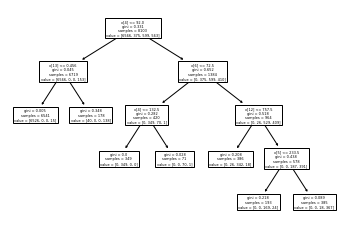

In [69]:
index = -6

print(train_scores[index])
print(test_scores[index])
print()
get_tree_description(clfs[index], feature_data.columns)